In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [19]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [21]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [23]:
# We can view all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

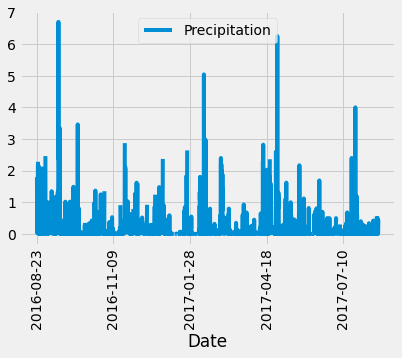

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel2 = [Measurement.station, Measurement.prcp, Measurement.id, Measurement.date, Measurement.tobs]
data_2017 = session.query(*sel2).\
    filter(Measurement.date >= '2017-01-01').\
    order_by(Measurement.date).all()
# Calculate the date 1 year ago from the last data point in the database
data_one_year = session.query(*sel2).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').all()
prcp_df = []
for row in prcp_data:
    prcp_df.append(row)
prcp_df
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_df, columns =['Date', 'Precipitation'])
df = df.set_index('Date')

# Sort the dataframe by date
df = df.sort_values('Date')
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot = 90)

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = df.describe()
summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
station_count

9

In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_actvity = session.query(Measurement.station,func.count(Measurement.station))\
                                     .group_by(Measurement.station)\
                                     .order_by(desc(func.count(Measurement.station))).all()
i = 1
for active_stations in station_actvity:
    print((i,active_stations[0],active_stations[1]))
    i+=1

(1, 'USC00519281', 2772)
(2, 'USC00519397', 2724)
(3, 'USC00513117', 2709)
(4, 'USC00519523', 2669)
(5, 'USC00516128', 2612)
(6, 'USC00514830', 2202)
(7, 'USC00511918', 1979)
(8, 'USC00517948', 1372)
(9, 'USC00518838', 511)


In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
                  .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

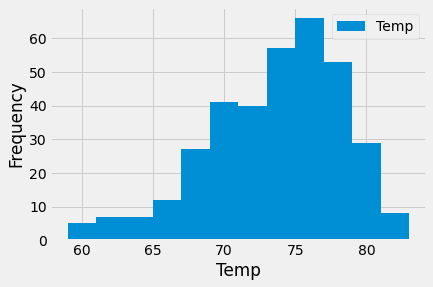

In [32]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Results = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
             filter(Measurement.date <= '2017-08-23').\
             filter(Measurement.date >= '2016-08-23').\
             filter(Measurement.station == 'USC00519281').order_by(desc(Measurement.date)).all()
Last_12 = pd.DataFrame(Results,columns=["Date","Station ID","Temp"])

Last_12.plot.hist(by="Temp", bins=12)
plt.ylim=(0,80)
plt.xlabel("Temp")
plt.show()